In [1]:
import pandas as pd
df=pd.read_csv('breast_cancer_dataset.csv')

In [2]:
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [3]:
df.isnull().sum()

clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    15
bland_chromatin                 0
normal_nucleoli                 0
mitosis                         0
class                           0
dtype: int64

In [6]:
me_dian=df['bare_nuclei'].median()
me_dian

1.0

In [9]:
df.fillna(me_dian,inplace=True)

In [10]:
df['bare_nuclei'].isnull().sum()

0

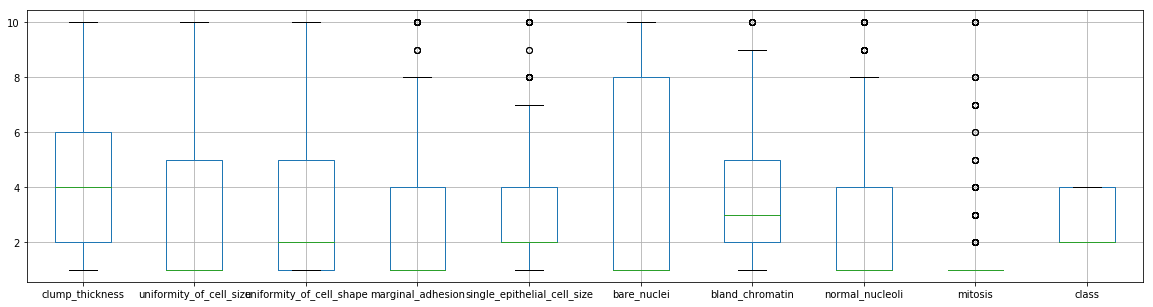

In [16]:
df.boxplot(figsize=(20,5))

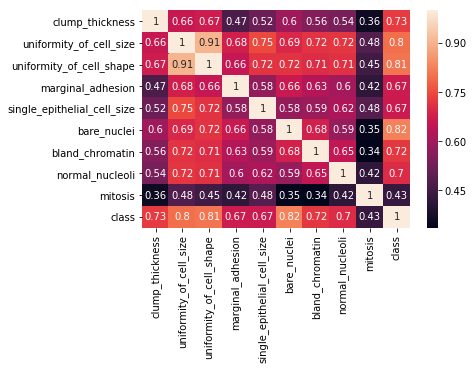

In [18]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [19]:
X=df[['uniformity_of_cell_size','bare_nuclei']]
X.head()

,uniformity_of_cell_size,bare_nuclei
0,1,1.0
1,4,10.0
2,1,2.0
3,8,4.0
4,1,1.0


In [20]:
Y=df['class']
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [53]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [22]:
model=LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_test,X_train,y_test,y_train=train_test_split(X,Y)

In [25]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
X_train.shape

(143, 2)

In [28]:
df.shape

(569, 10)

In [29]:
X_test.shape

(426, 2)

In [52]:
pred=model.predict(X_test).round()
pred

array([2., 2., 5., 2., 2., 4., 2., 2., 2., 4., 4., 4., 2., 2., 3., 2., 2.,
       3., 4., 2., 3., 3., 4., 2., 3., 4., 4., 2., 4., 2., 2., 2., 2., 2.,
       4., 5., 2., 4., 4., 5., 3., 3., 2., 2., 2., 2., 3., 2., 2., 4., 2.,
       4., 4., 2., 2., 3., 3., 2., 3., 2., 3., 5., 2., 5., 4., 2., 2., 3.,
       2., 4., 3., 2., 2., 2., 2., 2., 4., 2., 2., 4., 3., 2., 4., 2., 2.,
       2., 4., 2., 3., 2., 2., 4., 5., 3., 2., 5., 2., 4., 4., 5., 2., 2.,
       3., 2., 4., 2., 4., 3., 2., 4., 2., 2., 2., 3., 4., 4., 3., 2., 2.,
       2., 2., 2., 4., 3., 3., 4., 3., 2., 4., 2., 2., 2., 2., 3., 5., 3.,
       2., 2., 2., 2., 2., 2., 2.])

In [31]:
model.score(X_train,y_train)

0.7782352036065411

In [34]:
model.score(X_test,y_test)

0.7571538082502417

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
r2_score(y_test,pred)

0.7571538082502417

In [37]:
mean_squared_error(y_test,pred)

0.22421347792576157

In [38]:
model1=LinearRegression()

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,Y)

In [40]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
pred1=model.predict(X_test)

In [44]:
model1.score(X_train,y_train)

0.8064120527171512

In [51]:
model1.score(X_test,y_test)

0.6903953677857098

In [49]:
r2_score(y_test,pred1)

0.6903465609913937

#### Logistic Regression     

In [54]:
model2=LogisticRegression()

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.8)

In [84]:
model2.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
X_train.shape

(113, 2)

In [144]:
pred2=model2.predict(X_test)

In [145]:
pred2

array([4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2,

In [99]:
model2.score(X_test,y_test)

0.9451754385964912

In [89]:
r2_score(y_test,pred2)

0.7649629919798776

In [90]:
from scipy.stats import kurtosis

In [91]:
kur=kurtosis(df['uniformity_of_cell_size'],fisher=True)
kur

0.056779300737176186

In [94]:
model2.score(X_train,y_train)

0.9469026548672567

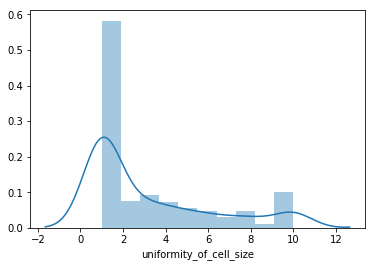

In [103]:
sns.distplot(df['uniformity_of_cell_size'])

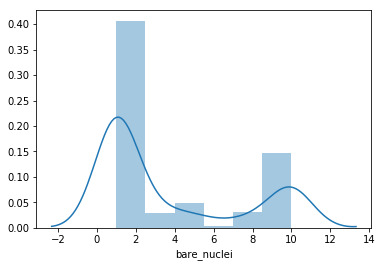

In [107]:
sns.distplot(df['bare_nuclei'])

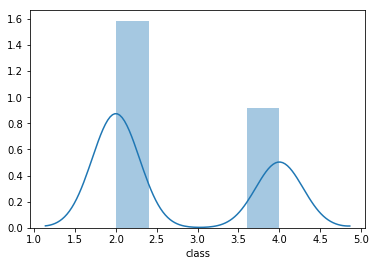

In [105]:
sns.distplot(df['class'])

In [108]:
import matplotlib.pyplot as plt

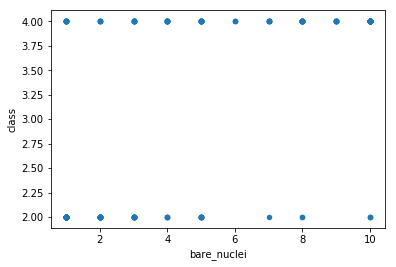

In [111]:
df.plot(x='bare_nuclei',y='class',kind='scatter')

In [114]:
df_test=dict(df_cancer['bare_nuclei'].value_counts())
df_test

{10.0: 114,
 8.0: 17,
 5.0: 16,
 1.0: 13,
 4.0: 12,
 3.0: 11,
 9.0: 9,
 7.0: 7,
 2.0: 6,
 6.0: 3}

In [117]:
df_cancer=df[df['class']==4]
df_cancer.shape

(208, 10)

In [123]:
#df.plot(x='class',kind='bar')

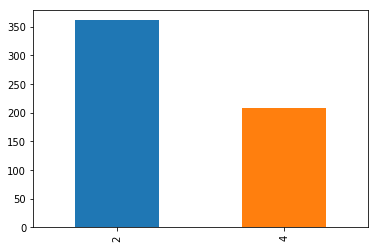

In [126]:
df['class'].value_counts().plot(kind='bar')

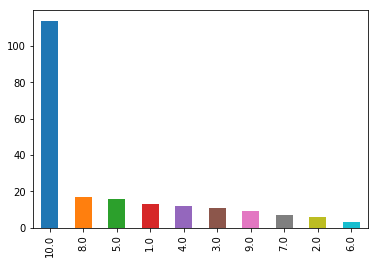

In [128]:
df_cancer['bare_nuclei'].value_counts().plot(kind='bar')

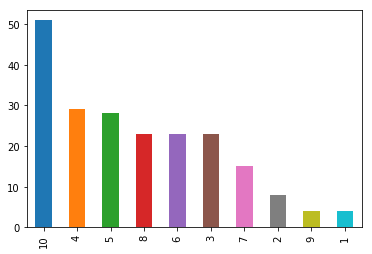

In [129]:
df_cancer['uniformity_of_cell_size'].value_counts().plot(kind='bar')

#### people who have cell size 10 and bare nuclei 10 will mostlikely get cancer

In [137]:
df_non_cancer=df[df['class']!=4]
df_non_cancer.shape

(361, 10)

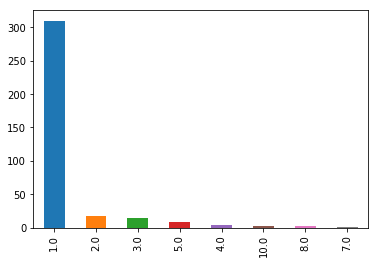

In [138]:
df_non_cancer['bare_nuclei'].value_counts().plot(kind='bar')

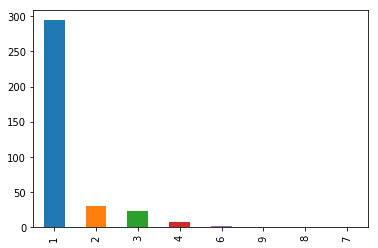

In [139]:
df_non_cancer['uniformity_of_cell_size'].value_counts().plot(kind='bar')